````
MODELE OK 
    max_df=0.3, 
    min_df=0.008, 
    ngram_range=(1, 2),
    binary=False
    n_components=7
````

In [1]:
!pip install pyLDAvis

  Using cached pyLDAvis-3.3.1-py2.py3-none-any.whl
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached future-0.18.2-py3-none-any.whl
  Using cached gensim-4.2.0-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (24.0 MB)
  Using cached funcy-1.17-py2.py3-none-any.whl (33 kB)


In [2]:
!pip install spacy

In [3]:
!pip install wordcloud -q

In [4]:
!pip install gensim

In [5]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [6]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation


In [7]:
from gensim import corpora, models

In [8]:
fn = "df_reviews_lemmatiz_filtre.plk"

In [9]:
df = pd.read_pickle(fn)

In [10]:
df.iloc[8071:8072,:]

,rating,review,date,token_spacy,review_clean,new_rating
8071,1,Une arnaque ! Jamais reçu l’article,2022-03-16T13:09:24.943Z,"(Une, arnaque, !, Jamais, reçu, l’, article)",arnaque recevoir article,0


In [11]:
df.review[27]

'J’aime trop 🔥🔥\nLa coupe taille haute s’adapte à merveille à mon 🍑 sans trop marquer sur les élastiques ni descendre/bouger dans la journée. Absorption sûrement un peu trop pour mon flux mais au moins je suis au sec toute la journée 😇 même mon chien ne me saute plus dessus pendant mes règles donc vraiment sans odeur!!! J’ADORE 👍🏻 '

In [12]:
df.token_spacy[27]

J’aime trop 🔥🔥
La coupe taille haute s’adapte à merveille à mon 🍑 sans trop marquer sur les élastiques ni descendre/bouger dans la journée. Absorption sûrement un peu trop pour mon flux mais au moins je suis au sec toute la journée 😇 même mon chien ne me saute plus dessus pendant mes règles donc vraiment sans odeur!!! J’ADORE 👍🏻 

In [13]:
df.review_clean[10]

'recevoir culotte règle promettre publicité plus satisfaite déjà rapport avoir qualité rapport fiabilité service bref gars aller c’ super pratique bon investissement'

PIPELINE 

In [14]:
tfidf = TfidfVectorizer(
    max_df=0.3, 
    min_df=0.008, 
    ngram_range=(1, 2),
    binary=False
)

X_tfidf = tfidf.fit_transform(df.review_clean)

print(X_tfidf.shape[1], "terms")


330 terms


MODELE

In [15]:
lda_model = LatentDirichletAllocation(n_components=7, 
                                max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,# paramètre (positif) qui dévalorise les premières itérations dans l'apprentissage en ligne.
                                random_state = 0,
                                n_jobs = -1)
lda_output = lda_model.fit_transform(X_tfidf)

VISUALISATION DES TOPICS

In [16]:
import pyLDAvis
import pyLDAvis.sklearn
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

#pyLDAvis extracts information from a fitted LDA topic model to inform an interactive web-based visualization
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, X_tfidf, tfidf, mds='tsne')

#CREATION D'UN FICHIER HTML
#file_vis = 'e_commerce.html'
#pyLDAvis.enable_notebook()
#vis_data = pyLDAvis.sklearn.prepare(lda_model, X_tfidf, tfidf, mds='tsne')
#pyLDAvis.save_html(vis_data, file_vis)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/opt/conda/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.9/site-package

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
5     -29.594002  60.112713       1        1  26.213386
6     -45.996586  11.891685       2        1  18.607385
1      20.368856  70.019325       3        1  13.284896
2      53.928768  31.704309       4        1  13.083013
0     -12.437127 -26.423267       5        1  11.497456
3       3.965971  21.797720       6        1   8.850425
4      37.524284 -16.517805       7        1   8.463440, topic_info=                Term        Freq       Total Category  logprob  loglift
9           agréable  341.000000  341.000000  Default  30.0000  30.0000
241         recevoir  319.000000  319.000000  Default  29.0000  29.0000
53       confortable  521.000000  521.000000  Default  28.0000  28.0000
10   agréable porter  237.000000  237.000000  Default  27.0000  27.0000
213           porter  302.000000  302.000000  Default  26.0000  26.0000
..               ...         ...         ...      ...      ...      ...
322             voir   17.332694   84.446399   Topic7  -4.8790   0.8859
241         recevoir   26.546481  319.796202   Topic7  -4.4527  -0.0194
250            règle   22.330132  197.683494   Topic7  -4.6257   0.2887
37               bon   22.382229  226.034743   Topic7  -4.6234   0.1570
36              bien   23.920742  387.715790   Topic7  -4.5569  -0.3161

[328 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.918262       12h
0         4  0.061217       12h
1         1  0.987060  abondant
1         4  0.007834  abondant
3         1  0.121169  absorber
...     ...       ...       ...
329       1  0.530211      être
329       2  0.200079      être
329       3  0.120048      être
329       4  0.090036      être
329       7  0.060024      être

[721 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 7, 2, 3, 1, 4, 5])

In [17]:
probas = pd.DataFrame(lda_output)

In [18]:
topics = probas.idxmax(axis=1)

In [19]:
df['topics']  = topics

CREATION D'UN NOUVEAU TOPIC

In [20]:
indexes_topics = df.groupby("topics").review.count().sort_values(ascending=False).index.tolist()
print(indexes_topics)

#d_indexes = {}
#for new_index, old_index in enumerate(indexes_topics):
#    new_index = new_index + 1
 #   print(f'new_index : {new_index}, old_index : {old_index}')
 #   d_indexes[old_index] = new_index
    


[5, 6, 0, 2, 1, 3, 4]


In [21]:
d_indexes = {5: 1, 6: 2, 0: 5, 2: 4, 1: 3, 3: 6, 4: 7}


In [22]:
df["topic_new"]  = df.topics.map(lambda t:  d_indexes[t])

In [23]:
d_indexes

{5: 1, 6: 2, 0: 5, 2: 4, 1: 3, 3: 6, 4: 7}

TOP 10 DES MOTS PAR TOPIC

In [24]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
for i,topic in enumerate(lda_model.components_):
    print('Top 10 words for topic (new from pydavis):', d_indexes[i])
    
    print('Top 10 words for topic (old from sklearn):', i)

    print(df[df.topics==i].shape[0])
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic (new from pydavis): 5
Top 10 words for topic (old from sklearn): 0
1541
['produit', 'merci', 'joli', 'qualité', 'rapide', 'parfaire', 'très agréable', 'porter', 'agréable porter', 'agréable']


Top 10 words for topic (new from pydavis): 3
Top 10 words for topic (old from sklearn): 1
1198
['commander', 'recevoir commande', 'ne', 'pas recevoir', 'toujours', 'jamais recevoir', 'pas', 'jamais', 'commande', 'recevoir']


Top 10 words for topic (new from pydavis): 4
Top 10 words for topic (old from sklearn): 2
1319
['odeur', 'culotte menstruel', 'sensation', 'menstruel', 'efficace', 'pas', 'fuite', 'recommande', 'très confortable', 'confortable']


Top 10 words for topic (new from pydavis): 6
Top 10 words for topic (old from sklearn): 3
876
['confort', 'ravir', 'content', 'absorber', 'pratique', 'joli', 'adore', 'super', 'top', 'confortable']


Top 10 words for topic (new from pydavis): 7
Top 10 words for topic (old from sklearn): 4
529
['avoir', 'hâter', 'air', 'toujo

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


TOPIC SUR NOTE

Rating = 1 / 5


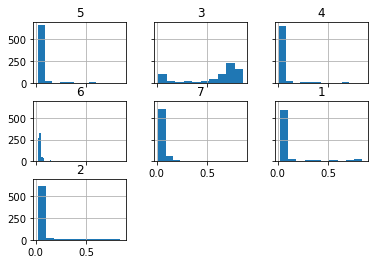




Rating = 2 / 5


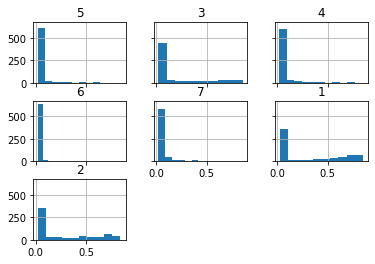




Rating = 3 / 5


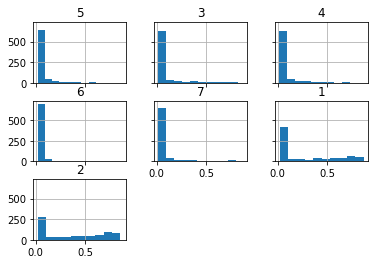




Rating = 4 / 5


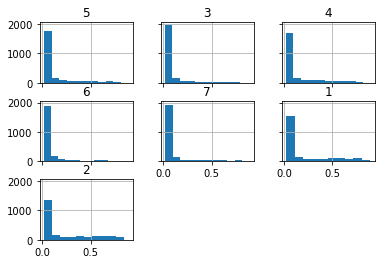




Rating = 5 / 5


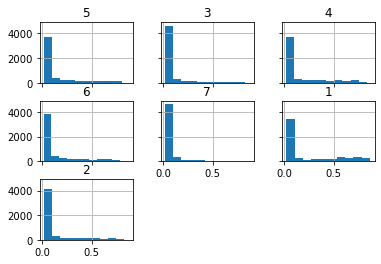

In [25]:
probas = pd.DataFrame(lda_output)


probas.columns = probas.columns.map(lambda col: d_indexes[col])

for rating in range(1, 6):

    rating_ = df[df.rating==rating]
    print(f"Rating = {rating} / 5")
    probas[probas.index.isin(rating_.index)].hist(sharex=True, sharey=True)
    
    plt.show()
    print("\n\n")

<AxesSubplot:xlabel='rating'>

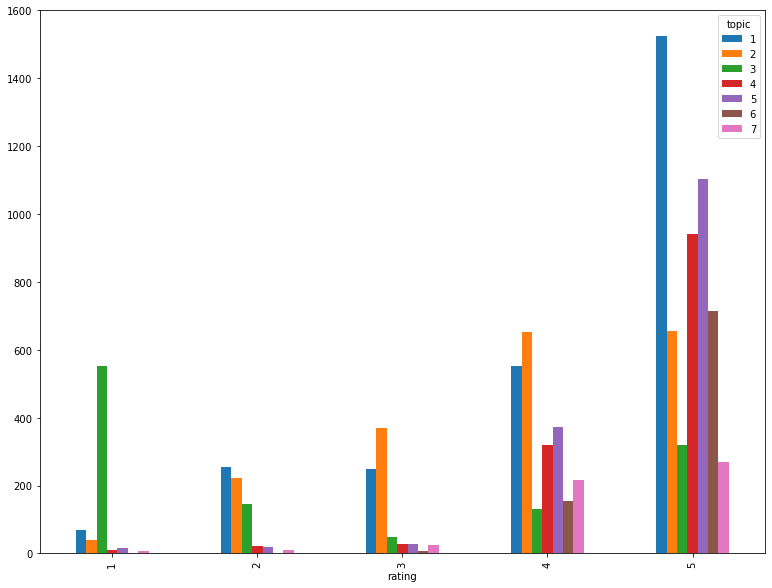

In [26]:
ct = pd.concat([topics, df["rating"]], axis=1)
ct.columns = ["topic", "rating"]

ct["topic"] = ct.topic.map(lambda t: d_indexes[t])

ct = ct.groupby(['rating']).topic.value_counts().unstack()


ct.plot(kind='bar', figsize=(13,10))

In [27]:
topics = probas.idxmax(axis=1)

VERIFICATION DES TOPICS

In [28]:
len(df[df.topic_new==3])

1198

In [29]:
df.groupby("topics").review.count().sort_values()

topics
4     529
3     876
1    1198
2    1319
0    1541
6    1939
5    2649
Name: review, dtype: int64

In [30]:
#####################################################

In [31]:
df.iloc[811:812,:]

,rating,review,date,token_spacy,review_clean,new_rating,topics,topic_new
811,4,"L’article est super, mais le service de livrai...",2022-03-02T14:08:47.836Z,"(L’, article, est, super, ,, mais, le, service...",article super service livraison poil moins bie...,1,1,3


In [32]:
## TOPIC 3 SAV/LIVRAISON NOTE INF OU EGAL A 3

In [27]:
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_row', None)
df_topic_3 = df[(df.rating <= 2) & (df.topic_new == 3)]

In [40]:
import pickle

In [42]:
df_topic_3.to_pickle('df_topic_3.plk')

In [29]:
pd.set_option('display.max_colwidth', None)
df[(df.rating <= 2) & (df.topic_new == 2)]
df.head(0)

,rating,review,date,token_spacy,review_clean,new_rating,topics,topic_new


In [35]:
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_row', None)
df[df.topic_new == 3].review

63                                                                                                                                                                                                                                                                                                                                                                                                                                                       Ce petit sac est très pratique et joli, j'en suis très satisfaite !
97                                                                                                                                                                                                                                                                                                                                                   J appréhendais à l idée d essayer ses culottes mais mon appréhension est vite passée. Je valide entièrement ses culottes , je suis à l aisé et je n ai